[NoteBook link](https://colab.research.google.com/drive/1fTnmlswKeDi4eiOhlgaaanlX7h3ARgU3?usp=drive_link)

#Car evaluation prediction
Description of the Problem and Dataset
Problem Description

The goal of this project is to create a machine learning model that can predict car evaluations based on various features

In [56]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score, accuracy_score,  classification_report, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


##Data Preprocessing Steps
    1- Loading the Data: The data was loaded into a pandas DataFrame.
    2- Exploratory Data Analysis (EDA):
          - Checked feature distributions.
          - Looked for missing values.
          - Analyzed feature relationships with the target variable.
    3- Data Cleaning:
          Handled missing values.
    4- Feature Encoding:
          Used One-Hot Encoding for categorical features.
    5- Data Splitting:
         Split the data into training and testing sets.

##Data Loading

###Dataset
     The dataset includes information about cars, such as buying price, maintenance cost, number of doors, seating capacity, luggage boot size, and safety. The target variable classifies cars as 'unacc', 'acc', 'good', or 'vgood'.

In [57]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [58]:
# Import the fetch_ucirepo function from the ucimlrepo package
from ucimlrepo import fetch_ucirepo
car_evaluation = fetch_ucirepo(id=19)

# # Extract the feature data (independent variables) from the dataset
x = car_evaluation.data.features

# # Extract the target variable (dependent variable) from the dataset
y = car_evaluation.data.targets


##EDA

In [59]:
print(car_evaluation.metadata)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [60]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [61]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


car_evaluation.data.values()

In [62]:
# Print the data types of the features in the dataset
x.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [63]:
# print the data type of the target in the dataset
y.dtypes


class    object
dtype: object

In [64]:
# Print the shape (dimensions) of the features in the dataset
# print the shape(dimensions)of the target in the dataset
y.shape, x.shape


((1728, 1), (1728, 6))

In [65]:
# using head to display the first 10 rows of the features and target in the dataset
x.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low
7,vhigh,vhigh,2,2,big,med
8,vhigh,vhigh,2,2,big,high
9,vhigh,vhigh,2,4,small,low


In [66]:
 y.head(10)

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
5,unacc
6,unacc
7,unacc
8,unacc
9,unacc


In [67]:
# using tail to display the last 10 rows of the features and target in the dataset
x.tail(10)

,buying,maint,doors,persons,lug_boot,safety
1718,low,low,5more,4,big,high
1719,low,low,5more,more,small,low
1720,low,low,5more,more,small,med
1721,low,low,5more,more,small,high
1722,low,low,5more,more,med,low
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med
1727,low,low,5more,more,big,high


In [68]:
y.tail(10)

,class
1718,vgood
1719,unacc
1720,acc
1721,good
1722,unacc
1723,good
1724,vgood
1725,unacc
1726,good
1727,vgood


In [69]:
# Print a summary of the features in the  dataset, including data types and non-null counts
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [70]:
# Print a summary of the target in the  dataset, including data types and non-null counts
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


In [71]:
y['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [72]:
# Print descriptive statistics of the features in the 'Car Evaluation' dataset
x.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [73]:
# Print descriptive statistics of the target in the 'Car Evaluation' dataset
y.describe()

,class
count,1728
unique,4
top,unacc
freq,1210


In [74]:
# Check for missing values in the features
x.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [75]:
# Check for missing values in the target
y.isnull().sum()


class    0
dtype: int64

In [76]:
# Print the value counts for each feature in the dataset to understand the distribution of different values within each feature
for col in x.columns:
     print(x[col].value_counts(), end='\n\n')


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64



In [77]:
# print the mode of the target
print(f'the mode of the target y is: {st.mode(y["class"])}')
# didn't get the mode of the feature because it's balanced data so every feature has equal elements

the mode of the target y is: unacc


In [78]:
# print the value counts of the target
y['class'].value_counts()


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

###Visualization

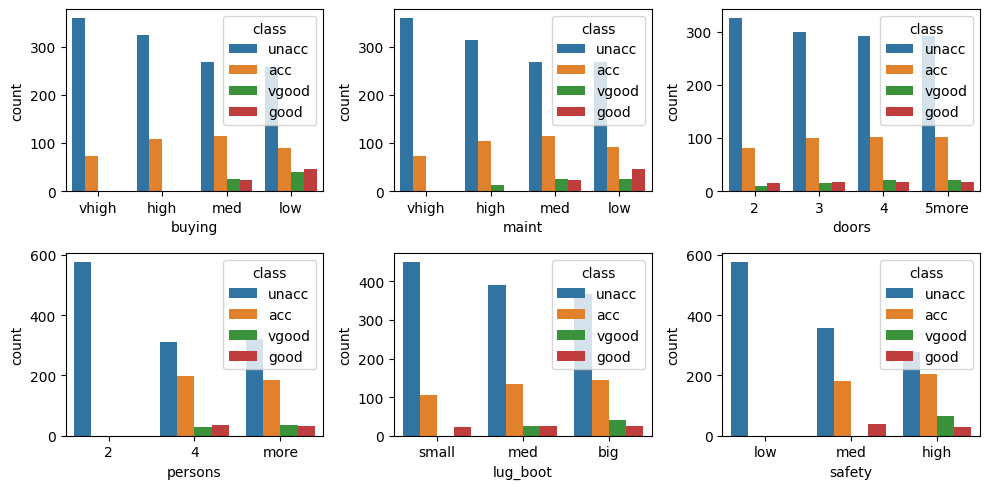

In [79]:
#Create a new figure
plt.figure(figsize=(10,5))

for i in x.columns:
    # Create a subplot for each feature
    plt.subplot(2,3,x.columns.get_loc(i)+1)

    # Create a countplot for the current feature
    sns.countplot(x, x=i,hue=y['class'] )

# Adjust subplot parameters to fit the figure neatly
plt.tight_layout()
plt.show()



###Data Splitting

In [80]:
# Split the dataset into training and testing sets
# x contains the feature data, y contains the target data
# 80% of the data is used for training and 20% for testing
X_train,X_test,Y_train,Y_test=train_test_split(x,y, random_state=42,train_size=.80)

In [81]:
# Print the shapes of the training and testing datasets for features and targets
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1382, 6), (346, 6), (1382, 1), (346, 1))

###Feature Encoding

In [91]:
# Create an instance of LabelEncoder to convert categorical values to numeric values
le = LabelEncoder()

# Iterate over each column (feature) in X_train and X_test
for col in X_train.columns:

    # Fit the LabelEncoder on the training data and transform the training feature
    X_train[col] = le.fit_transform(X_train[col])

    # Transform the testing feature using the same encoder
    X_test[col] = le.transform(X_test[col])
X_train

,buying,maint,doors,persons,lug_boot,safety
107,3,3,3,2,0,0
901,2,3,1,1,2,2
1709,1,1,3,0,0,0
706,0,2,2,0,1,2
678,0,2,1,0,1,1
...,...,...,...,...,...,...
1130,2,2,1,2,1,0
1294,2,1,3,2,0,2
860,0,1,3,2,1,0
1459,1,0,2,0,2,2


In [92]:
# Fit the LabelEncoder on the training target data and transform it
Y_train=le.fit_transform(Y_train)

# Transform the testing target data using the same encoder
Y_test=le.transform(Y_test)
Y_train

array([2, 2, 2, ..., 0, 2, 0])

In [85]:
# Shape of the training feature set
print(f"X_train: {X_train.shape}")

# Shape of the testing feature set
print(f"X_test: {X_test.shape}")

# Shape of the training target set
print(f"Y_train: {Y_train.shape}")

# Shape of the testing target set
print(f"Y_test: {Y_test.shape}")

X_train: (1382, 6)
X_test: (346, 6)
Y_train: (1382,)
Y_test: (346,)


In [86]:
# Create an instance of StandardScaler to standardize features
scale = StandardScaler()
# Fit the scaler on the training feature set and transform the training data
scaled_Xtrain = scale.fit_transform(X_train)
# Transform the testing feature set using the same scaler
scaled_xtest=scale.transform(X_test)

In [87]:
# Create a DataFrame from the scaled training feature set with the original column names
scaled_data = pd.DataFrame(scaled_Xtrain, columns=X_train.columns)
scaled_data

,buying,maint,doors,persons,lug_boot,safety
0,1.351852,1.349481,1.341906,1.225035,-1.224748,-1.232997
1,0.450617,1.349481,-0.443856,-0.008030,1.221208,1.227655
2,-0.450617,-0.434338,1.341906,-1.241095,-1.224748,-1.232997
3,-1.351852,0.457572,0.449025,-1.241095,-0.001770,1.227655
4,-1.351852,0.457572,-0.443856,-1.241095,-0.001770,-0.002671
...,...,...,...,...,...,...
1377,0.450617,0.457572,-0.443856,1.225035,-0.001770,-1.232997
1378,0.450617,-0.434338,1.341906,1.225035,-1.224748,1.227655
1379,-1.351852,-0.434338,1.341906,1.225035,-0.001770,-1.232997
1380,-0.450617,-1.326248,0.449025,-1.241095,1.221208,1.227655


##Model Selection, Training, and Evaluation
    Model Selection

       Considered several algorithms:

           Logistic Regression
           Decision Tree
           Random Forest
           Support Vector Machine (SVM)
           Gradient Boosting.  

    Hyperparameter Tuning

       Used Random Search for tuning hyperparameters of the Random Forest model:

        n_estimators: Number of trees.
        max_depth: Maximum depth of trees.
        min_samples_split: Minimum samples to split a node.
    
    

In [53]:
def evaluation_parametrics(y_test,yp_test):

    # Print classification reports for both training and test data
    # Provides precision, recall, and F1-score for each class

  print(classification_report(y_test, yp_test))

    # Mean absolute error
    # Measures the average magnitude of errors in the predictions


  print(f'The mean absolute error on test data : {round(mean_absolute_error(y_test,yp_test),2)}')

     # Root mean square error
  #    # Measures the square root of the average squared differences between predictions and actual values

  print(f'The root mean squared error on test data : {round(math.sqrt(mean_absolute_error(y_test,yp_test)),2)}')

     # Recall
     # Measures the ability of the model to identify all relevant instances

  print(f'Recall on test data: {round(recall_score(y_test, yp_test, average="macro"),2)}')

     # Accuracy
     #  Measures the ratio of correctly predicted instances to the total instances

  print(f'Accuracy on test data: {round(accuracy_score(y_test, yp_test),2)}')

     # Percision
     # Measures the ratio of correctly predicted positive observations to the total predicted positives

  print(f'percision on test data: {round(precision_score(y_test,yp_test, average="macro"),2)}')

      # f1 score
      # Harmonic mean of precision and recall

  print(f'f1 score on test data: {round(f1_score(y_test,yp_test, average="macro"),2)}')




###Model selection & Training

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346

The mean absolute error on test data : 0.68
The root mean squared error on test data : 0.82
Recall on test data: 0.26
Accuracy on test data: 0.66
percision on test data: 0.25
f1 score on test data: 0.25


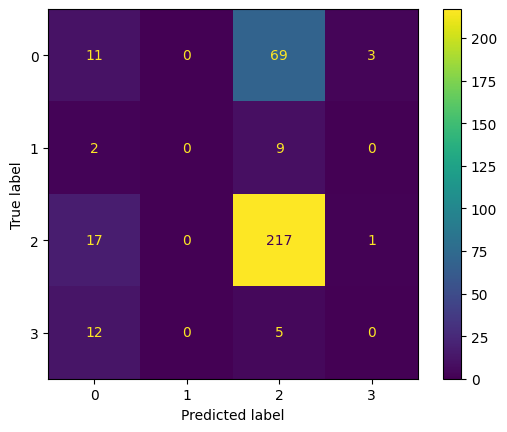

In [88]:
# Create an instance of LogisticRegression
lr = LogisticRegression(max_iter = 1000,random_state = 48)

# Fit the model on the training data
lr.fit(X_train,Y_train)

# Make predictions on the training and testing data
# yp_train = lr.predict(X_train)
yp_test = lr.predict(X_test)

# Evaluate the model's performance using evaluation_parametrics function
evaluation_parametrics(Y_test,yp_test)

#   Confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test,yp_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.84      0.91        83
           1       0.48      1.00      0.65        11
           2       0.99      1.00      0.99       235
           3       1.00      0.82      0.90        17

    accuracy                           0.95       346
   macro avg       0.86      0.92      0.86       346
weighted avg       0.97      0.95      0.96       346

The mean absolute error on test data : 0.07
The root mean squared error on test data : 0.26
Recall on test data: 0.92
Accuracy on test data: 0.95
percision on test data: 0.86
f1 score on test data: 0.86


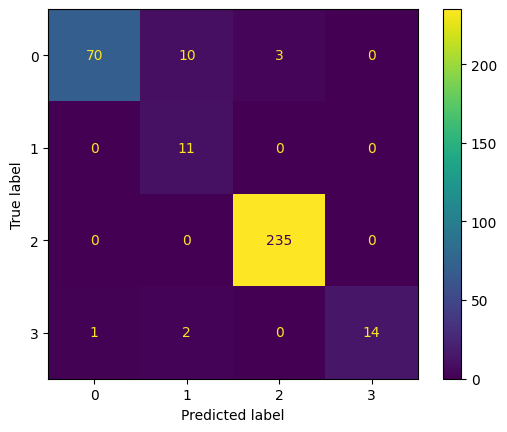

In [54]:
# Create an instance of DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10,random_state=48)

# Fit the model on the training data
dt.fit(X_train,Y_train)

# Make predictions on the training and testing data
yp_train = dt.predict(X_train)
yp_test = dt.predict(X_test)

# Evaluate the model's performance using evaluation_parametrics function
evaluation_parametrics(Y_test,yp_test)

#   Confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test,yp_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        83
           1       0.60      0.82      0.69        11
           2       0.99      1.00      1.00       235
           3       0.94      0.94      0.94        17

    accuracy                           0.97       346
   macro avg       0.88      0.92      0.89       346
weighted avg       0.97      0.97      0.97       346

The mean absolute error on test data : 0.05
The root mean squared error on test data : 0.22
Recall on test data: 0.92
Accuracy on test data: 0.97
percision on test data: 0.88
f1 score on test data: 0.89


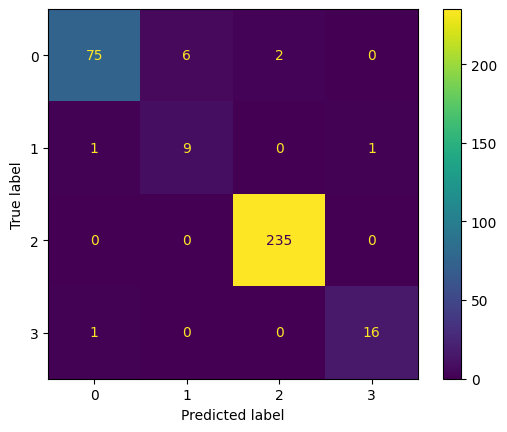

In [55]:
# Create an instance of RandomForestClassifier
rf=RandomForestClassifier(max_depth=10,random_state=48)

# Create an instance of RandomForestClassifier
rf.fit(X_train,Y_train)

# Make predictions on the training and testing data

yp_test = rf.predict(X_test)

# Evaluate the model's performance using evaluation_parametrics function
evaluation_parametrics(Y_test,yp_test)

#   Confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test,yp_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

###Training and Evaluation

    Implemented Random Search

In [89]:
# Define the parameter grid for Random Forest
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [90]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20)
}


####Results
     Best parameters: {'max_depth': 40, 'min_samples_split': 3, 'n_estimators': 167}
     Best score: 0.9776

In [51]:
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,        # Number of folds in cross-validation
    scoring='accuracy',  # Metric for evaluating model performance
    verbose=1,   # Controls the verbosity
    n_jobs=-1    # Uses all available CPUs
)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ccb53e6fe20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ccb53f2bb50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ccb53e8d060>},
                   scoring='accuracy', verbose=1)

In [52]:
print("Best parameters found: ", random_search.best_params_)
print("Best score achieved: ", random_search.best_score_)

Best parameters found:  {'max_depth': 35, 'min_samples_split': 2, 'n_estimators': 65}
Best score achieved:  0.971775754721917


##Discussion of Results and Insights Gained
  The Random Forest model achieved a high accuracy of 97.76%. Important features included safety and buying price.



##Recommendations for Further Improvement
     1-Data Augmentation: Collect more data or create synthetic samples.
     2-Feature Engineering: Create or explore new features.
     3-Model Ensemble: Combine multiple models to improve accuracy.
     4-Advanced Tuning: Use Bayesian Optimization for hyperparameter tuning.
     5-Real-time Predictions: Develop a system for real-time predictions.

##Social, Professional, Legal, and Ethical Issues
         - Bias and Fairness: Ensure the model is fair and unbiased.
         - Privacy: Protect user privacy and follow data protection laws.
         - Transparency: Be clear about how the model makes decisions.
         - Accountability: Establish responsibility for the model's predictions
          and address any issues promptly.